In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

adult_data = pd.read_csv('../data/adult_data.csv')
adult_data


,age_g,workclass_b,fnlwgt_g,education_b,educationnum_g,maritalstatus_b,occupation_b,relationship_b,race_b,sex_b,capitalgain_g,capitalloss_g,hoursperweek_g,nativecountry_b,income_g
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [4]:
# Remove rows with question marks in them.
adult_data = adult_data[adult_data.workclass_b != ' ?']
adult_data = adult_data[adult_data.occupation_b != ' ?']
adult_data = adult_data[adult_data.nativecountry_b != ' ?']

# Remove dot from incomes with a dot
adult_data.loc[adult_data['income_g'] == ' >50K.', 'income_g'] = ' >50K'
adult_data.loc[adult_data['income_g'] == ' <=50K.', 'income_g'] = ' <=50K'

# Income greater than 50K is 1
adult_data.loc[adult_data['income_g'] == ' >50K', 'income_g'] = 1

# Income less than 50K is 0
adult_data.loc[adult_data['income_g'] == ' <=50K', 'income_g'] = 0



# adult_data['education'] = adult_data.cc.cat.codes


In [25]:
# One-hot encode categorical columns
x = pd.get_dummies(data=adult_data,columns=['workclass_b','education_b','maritalstatus_b','occupation_b','relationship_b','race_b','nativecountry_b'])

In [26]:
display(x)

,age_g,fnlwgt_g,educationnum_g,sex_b,capitalgain_g,capitalloss_g,hoursperweek_g,income_g,workclass_b_ ?,workclass_b_ Federal-gov,workclass_b_ Local-gov,workclass_b_ Never-worked,workclass_b_ Private,workclass_b_ Self-emp-inc,workclass_b_ Self-emp-not-inc,workclass_b_ State-gov,workclass_b_ Without-pay,education_b_ 10th,education_b_ 11th,education_b_ 12th,education_b_ 1st-4th,education_b_ 5th-6th,education_b_ 7th-8th,education_b_ 9th,education_b_ Assoc-acdm,education_b_ Assoc-voc,education_b_ Bachelors,education_b_ Doctorate,education_b_ HS-grad,education_b_ Masters,education_b_ Preschool,education_b_ Prof-school,education_b_ Some-college,maritalstatus_b_ Divorced,maritalstatus_b_ Married-AF-spouse,maritalstatus_b_ Married-civ-spouse,maritalstatus_b_ Married-spouse-absent,maritalstatus_b_ Never-married,maritalstatus_b_ Separated,maritalstatus_b_ Widowed,occupation_b_ ?,occupation_b_ Adm-clerical,occupation_b_ Armed-Forces,occupation_b_ Craft-repair,occupation_b_ Exec-managerial,occupation_b_ Farming-fishing,occupation_b_ Handlers-cleaners,occupation_b_ Machine-op-inspct,occupation_b_ Other-service,occupation_b_ Priv-house-serv,occupation_b_ Prof-specialty,occupation_b_ Protective-serv,occupation_b_ Sales,occupation_b_ Tech-support,occupation_b_ Transport-moving,relationship_b_ Husband,relationship_b_ Not-in-family,relationship_b_ Other-relative,relationship_b_ Own-child,relationship_b_ Unmarried,relationship_b_ Wife,race_b_ Amer-Indian-Eskimo,race_b_ Asian-Pac-Islander,race_b_ Black,race_b_ Other,race_b_ White,nativecountry_b_ ?,nativecountry_b_ Cambodia,nativecountry_b_ Canada,nativecountry_b_ China,nativecountry_b_ Columbia,nativecountry_b_ Cuba,nativecountry_b_ Dominican-Republic,nativecountry_b_ Ecuador,nativecountry_b_ El-Salvador,nativecountry_b_ England,nativecountry_b_ France,nativecountry_b_ Germany,nativecountry_b_ Greece,nativecountry_b_ Guatemala,nativecountry_b_ Haiti,nativecountry_b_ Holand-Netherlands,nativecountry_b_ Honduras,nativecountry_b_ Hong,nativecountry_b_ Hungary,nativecountry_b_ India,nativecountry_b_ Iran,nativecountry_b_ Ireland,nativecountry_b_ Italy,nativecountry_b_ Jamaica,nativecountry_b_ Japan,nativecountry_b_ Laos,nativecountry_b_ Mexico,nativecountry_b_ Nicaragua,nativecountry_b_ Outlying-US(Guam-USVI-etc),nativecountry_b_ Peru,nativecountry_b_ Philippines,nativecountry_b_ Poland,nativecountry_b_ Portugal,nativecountry_b_ Puerto-Rico,nativecountry_b_ Scotland,nativecountry_b_ South,nativecountry_b_ Taiwan,nativecountry_b_ Thailand,nativecountry_b_ Trinadad&Tobago,nativecountry_b_ United-States,nativecountry_b_ Vietnam,nativecountry_b_ Yugoslavia
0,39,77516,13,Male,2174,0,40,<=50K,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,Male,0,0,13,<=50K,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,Male,0,0,40,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,Male,0,0,40,<=50K,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,Female,0,0,40,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [27]:

# # Remove dot from incomes with a dot
# x.loc[x['income'] == ' >50K.', 'income'] = ' >50K'
# x.loc[x['income'] == ' <=50K.', 'income'] = ' <=50K'

# # Income greater than 50K is 1
# x.loc[x['income'] == ' >50K', 'income'] = 1

# # Income less than 50K is 0
# x.loc[x['income'] == ' <=50K', 'income'] = 0

# Female is 1
x.loc[x['sex_b'] == ' Female', 'sex_b'] = 1

# Male is 0
x.loc[x['sex_b'] == ' Male', 'sex_b'] = 0


In [28]:
x

,age_g,fnlwgt_g,educationnum_g,sex_b,capitalgain_g,capitalloss_g,hoursperweek_g,income_g,workclass_b_ ?,workclass_b_ Federal-gov,workclass_b_ Local-gov,workclass_b_ Never-worked,workclass_b_ Private,workclass_b_ Self-emp-inc,workclass_b_ Self-emp-not-inc,workclass_b_ State-gov,workclass_b_ Without-pay,education_b_ 10th,education_b_ 11th,education_b_ 12th,education_b_ 1st-4th,education_b_ 5th-6th,education_b_ 7th-8th,education_b_ 9th,education_b_ Assoc-acdm,education_b_ Assoc-voc,education_b_ Bachelors,education_b_ Doctorate,education_b_ HS-grad,education_b_ Masters,education_b_ Preschool,education_b_ Prof-school,education_b_ Some-college,maritalstatus_b_ Divorced,maritalstatus_b_ Married-AF-spouse,maritalstatus_b_ Married-civ-spouse,maritalstatus_b_ Married-spouse-absent,maritalstatus_b_ Never-married,maritalstatus_b_ Separated,maritalstatus_b_ Widowed,occupation_b_ ?,occupation_b_ Adm-clerical,occupation_b_ Armed-Forces,occupation_b_ Craft-repair,occupation_b_ Exec-managerial,occupation_b_ Farming-fishing,occupation_b_ Handlers-cleaners,occupation_b_ Machine-op-inspct,occupation_b_ Other-service,occupation_b_ Priv-house-serv,occupation_b_ Prof-specialty,occupation_b_ Protective-serv,occupation_b_ Sales,occupation_b_ Tech-support,occupation_b_ Transport-moving,relationship_b_ Husband,relationship_b_ Not-in-family,relationship_b_ Other-relative,relationship_b_ Own-child,relationship_b_ Unmarried,relationship_b_ Wife,race_b_ Amer-Indian-Eskimo,race_b_ Asian-Pac-Islander,race_b_ Black,race_b_ Other,race_b_ White,nativecountry_b_ ?,nativecountry_b_ Cambodia,nativecountry_b_ Canada,nativecountry_b_ China,nativecountry_b_ Columbia,nativecountry_b_ Cuba,nativecountry_b_ Dominican-Republic,nativecountry_b_ Ecuador,nativecountry_b_ El-Salvador,nativecountry_b_ England,nativecountry_b_ France,nativecountry_b_ Germany,nativecountry_b_ Greece,nativecountry_b_ Guatemala,nativecountry_b_ Haiti,nativecountry_b_ Holand-Netherlands,nativecountry_b_ Honduras,nativecountry_b_ Hong,nativecountry_b_ Hungary,nativecountry_b_ India,nativecountry_b_ Iran,nativecountry_b_ Ireland,nativecountry_b_ Italy,nativecountry_b_ Jamaica,nativecountry_b_ Japan,nativecountry_b_ Laos,nativecountry_b_ Mexico,nativecountry_b_ Nicaragua,nativecountry_b_ Outlying-US(Guam-USVI-etc),nativecountry_b_ Peru,nativecountry_b_ Philippines,nativecountry_b_ Poland,nativecountry_b_ Portugal,nativecountry_b_ Puerto-Rico,nativecountry_b_ Scotland,nativecountry_b_ South,nativecountry_b_ Taiwan,nativecountry_b_ Thailand,nativecountry_b_ Trinadad&Tobago,nativecountry_b_ United-States,nativecountry_b_ Vietnam,nativecountry_b_ Yugoslavia
0,39,77516,13,0,2174,0,40,<=50K,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,0,13,<=50K,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,0,40,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,0,40,<=50K,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,1,0,0,40,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [31]:
x.groupby('income_g').count()

,age_g,fnlwgt_g,educationnum_g,sex_b,capitalgain_g,capitalloss_g,hoursperweek_g,workclass_b_ ?,workclass_b_ Federal-gov,workclass_b_ Local-gov,workclass_b_ Never-worked,workclass_b_ Private,workclass_b_ Self-emp-inc,workclass_b_ Self-emp-not-inc,workclass_b_ State-gov,workclass_b_ Without-pay,education_b_ 10th,education_b_ 11th,education_b_ 12th,education_b_ 1st-4th,education_b_ 5th-6th,education_b_ 7th-8th,education_b_ 9th,education_b_ Assoc-acdm,education_b_ Assoc-voc,education_b_ Bachelors,education_b_ Doctorate,education_b_ HS-grad,education_b_ Masters,education_b_ Preschool,education_b_ Prof-school,education_b_ Some-college,maritalstatus_b_ Divorced,maritalstatus_b_ Married-AF-spouse,maritalstatus_b_ Married-civ-spouse,maritalstatus_b_ Married-spouse-absent,maritalstatus_b_ Never-married,maritalstatus_b_ Separated,maritalstatus_b_ Widowed,occupation_b_ ?,occupation_b_ Adm-clerical,occupation_b_ Armed-Forces,occupation_b_ Craft-repair,occupation_b_ Exec-managerial,occupation_b_ Farming-fishing,occupation_b_ Handlers-cleaners,occupation_b_ Machine-op-inspct,occupation_b_ Other-service,occupation_b_ Priv-house-serv,occupation_b_ Prof-specialty,occupation_b_ Protective-serv,occupation_b_ Sales,occupation_b_ Tech-support,occupation_b_ Transport-moving,relationship_b_ Husband,relationship_b_ Not-in-family,relationship_b_ Other-relative,relationship_b_ Own-child,relationship_b_ Unmarried,relationship_b_ Wife,race_b_ Amer-Indian-Eskimo,race_b_ Asian-Pac-Islander,race_b_ Black,race_b_ Other,race_b_ White,nativecountry_b_ ?,nativecountry_b_ Cambodia,nativecountry_b_ Canada,nativecountry_b_ China,nativecountry_b_ Columbia,nativecountry_b_ Cuba,nativecountry_b_ Dominican-Republic,nativecountry_b_ Ecuador,nativecountry_b_ El-Salvador,nativecountry_b_ England,nativecountry_b_ France,nativecountry_b_ Germany,nativecountry_b_ Greece,nativecountry_b_ Guatemala,nativecountry_b_ Haiti,nativecountry_b_ Holand-Netherlands,nativecountry_b_ Honduras,nativecountry_b_ Hong,nativecountry_b_ Hungary,nativecountry_b_ India,nativecountry_b_ Iran,nativecountry_b_ Ireland,nativecountry_b_ Italy,nativecountry_b_ Jamaica,nativecountry_b_ Japan,nativecountry_b_ Laos,nativecountry_b_ Mexico,nativecountry_b_ Nicaragua,nativecountry_b_ Outlying-US(Guam-USVI-etc),nativecountry_b_ Peru,nativecountry_b_ Philippines,nativecountry_b_ Poland,nativecountry_b_ Portugal,nativecountry_b_ Puerto-Rico,nativecountry_b_ Scotland,nativecountry_b_ South,nativecountry_b_ Taiwan,nativecountry_b_ Thailand,nativecountry_b_ Trinadad&Tobago,nativecountry_b_ United-States,nativecountry_b_ Vietnam,nativecountry_b_ Yugoslavia
income_g,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
<=50K,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720
<=50K.,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,

In [40]:
adult_data_export = np.array(x)
adult_data_export

%store adult_data_export

Stored 'adult_data_export' (ndarray)


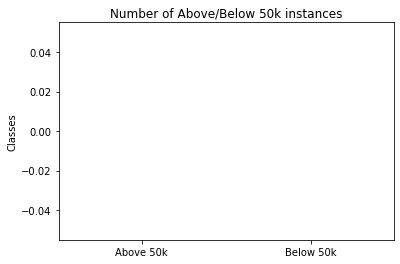

In [41]:
classes = ('Above 50k', 'Below 50k')
y_pos = np.arange(len(classes))
num_above = np.count_nonzero(adult_data_export[:,7]==1)
num_below = np.count_nonzero(adult_data_export[:,7]==0)
num = [num_above, num_below]

plt.bar(y_pos, num, align='center', alpha=0.5)
plt.xticks(y_pos, classes)
plt.ylabel('Classes')
plt.title('Number of Above/Below 50k instances')

plt.show()

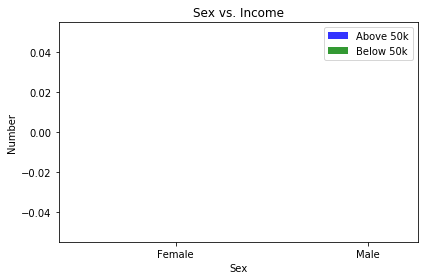

In [39]:
n_groups = 2

female_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,7]==1, adult_data_export[:,3]==1))
female_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,7]==0, adult_data_export[:,3]==1))
male_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,7]==1, adult_data_export[:,3]==0))
male_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,7]==0, adult_data_export[:,3]==0))
num_above50k = (female_above50k, male_above50k)
num_below50k = (female_below50k, male_below50k)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, num_above50k, bar_width,
alpha=opacity,
color='b',
label='Above 50k')

rects2 = plt.bar(index + bar_width, num_below50k, bar_width,
alpha=opacity,
color='g',
label='Below 50k')

plt.xlabel('Sex')
plt.ylabel('Number')
plt.title('Sex vs. Income')
plt.xticks(index + bar_width, ('Female', 'Male'))
plt.legend()

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Hours per week')

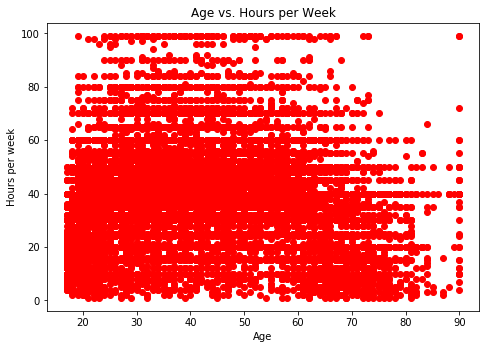

In [35]:
age = adult_data_export[:, 0] # age 
hours_per_week = adult_data_export[:, 6] # hours per week 
y_pos = np.arange(len(age))


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(age, hours_per_week, color='r')
# ax.scatter(x3, x4, color='g')
# ax.scatter(x5, x6, color='b')
# ax.legend(('data', 'line-regression r={}'.format(r_value)), 'best')


ax.set_title('Age vs. Hours per Week')
ax.set_xlabel('Age')
ax.set_ylabel('Hours per week')


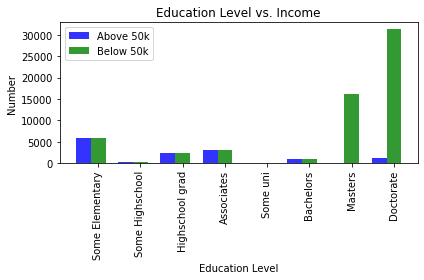

In [36]:
n_groups = 8 

# 1st - 4th grade and 
someelem_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,18]==1, adult_data_export[:,3]==1))
someelem_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,18]==1, adult_data_export[:,3]==1))

#5th - 6th grade 
someelem_above50k += np.count_nonzero(np.logical_and(adult_data_export[:,19]==1, adult_data_export[:,3]==1))
someelem_below50k += np.count_nonzero(np.logical_and(adult_data_export[:,19]==1, adult_data_export[:,3]==1))

# 7th - 8th grade 
someelem_above50k += np.count_nonzero(np.logical_and(adult_data_export[:,20]==1, adult_data_export[:,3]==1))
someelem_below50k += np.count_nonzero(np.logical_and(adult_data_export[:,20]==1, adult_data_export[:,3]==1))

# preschool
someelem_above50k += np.count_nonzero(np.logical_and(adult_data_export[:,28]==1, adult_data_export[:,3]==1))
someelem_below50k += np.count_nonzero(np.logical_and(adult_data_export[:,28]==1, adult_data_export[:,3]==1))

#10th
somehs_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,15]==1, adult_data_export[:,3]==0))
somehs_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,15]==1, adult_data_export[:,3]==0))

#11th
somehs_above50k += np.count_nonzero(np.logical_and(adult_data_export[:,16]==1, adult_data_export[:,3]==0))
somehs_below50k += np.count_nonzero(np.logical_and(adult_data_export[:,16]==1, adult_data_export[:,3]==0))

#12th
somehs_above50k += np.count_nonzero(np.logical_and(adult_data_export[:,17]==1, adult_data_export[:,3]==0))
somehs_below50k += np.count_nonzero(np.logical_and(adult_data_export[:,17]==1, adult_data_export[:,3]==0))

#9th
somehs_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,21]==1, adult_data_export[:,3]==0))
somehs_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,21]==1, adult_data_export[:,3]==0))

#hs grad
hs_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,26]==1, adult_data_export[:,3]==1))
hs_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,26]==1, adult_data_export[:,3]==1))

#assoc-acdm
assoc_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,22]==1, adult_data_export[:,3]==0))
assoc_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,22]==1, adult_data_export[:,3]==0))

#assoc-voc
assoc_above50k += np.count_nonzero(np.logical_and(adult_data_export[:,23]==1, adult_data_export[:,3]==0))
assoc_below50k += np.count_nonzero(np.logical_and(adult_data_export[:,23]==1, adult_data_export[:,3]==0))

#prof-school
assoc_above50k += np.count_nonzero(np.logical_and(adult_data_export[:,29]==1, adult_data_export[:,3]==0))
assoc_below50k += np.count_nonzero(np.logical_and(adult_data_export[:,29]==1, adult_data_export[:,3]==0))

#some college
someuni_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,30]==1, adult_data_export[:,3]==1))
someuni_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,30]==1, adult_data_export[:,3]==1))

#bachelors
bach_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,24]==1, adult_data_export[:,3]==0))
bach_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,24]==1, adult_data_export[:,3]==0))

#masters
masters_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,27]==1, adult_data_export[:,3]==1))
masters_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,27]==1, adult_data_export[:,3]==1))

#doctors
doctor_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,25]==1, adult_data_export[:,3]==0))
doctor_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,25]==1, adult_data_export[:,3]==0))

num_above50k = (someelem_above50k, somehs_above50k, hs_above50k, assoc_above50k, 
                someuni_above50k, bach_above50k, masters_above50k, doctor_above50k)
num_below50k = (someelem_below50k, somehs_below50k, hs_above50k, assoc_below50k,
               someuni_below50k, bach_below50k, masters_below50k, doctor_below50k)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, num_above50k, bar_width,
alpha=opacity,
color='b',
label='Above 50k')

rects2 = plt.bar(index + bar_width, num_below50k, bar_width,
alpha=opacity,
color='g',
label='Below 50k')

plt.xlabel('Education Level')
plt.ylabel('Number')
plt.title('Education Level vs. Income')
plt.xticks(index + bar_width, ('Some Elementary', 'Some Highschool', 'Highschool grad', 'Associates', 'Some uni',
                              'Bachelors', 'Masters', 'Doctorate'), rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()


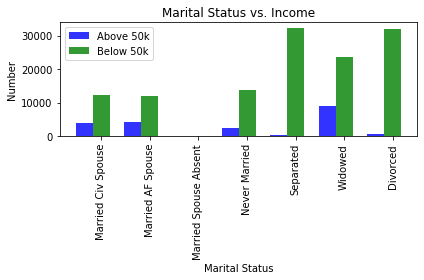

In [37]:
n_groups = 7

# married-civ-spouse
marriedciv_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,33]==1, adult_data_export[:,3]==1))
marriedciv_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,33]==0, adult_data_export[:,3]==1))

# married-af-spouse
marriedaf_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,32]==1, adult_data_export[:,3]==1))
marriedaf_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,32]==0, adult_data_export[:,3]==1))

# married-spouse-absent
marriedabs_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,34]==1, adult_data_export[:,3]==1))
marriedabs_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,34]==0, adult_data_export[:,3]==1))

# never married
nevermar_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,35]==1, adult_data_export[:,3]==1))
nevermar_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,35]==0, adult_data_export[:,3]==1))

# separated
separated_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,36]==1, adult_data_export[:,3]==0))
separated_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,36]==0, adult_data_export[:,3]==0))

# widowed
widowed_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,37]==1, adult_data_export[:,3]==0))
widowed_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,37]==0, adult_data_export[:,3]==0))

# divorced
divorced_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,31]==1, adult_data_export[:,3]==0))
divorced_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,31]==0, adult_data_export[:,3]==0))

num_above50k = (marriedciv_above50k, marriedaf_above50k, marriedabs_above50k, nevermar_above50k, 
                separated_above50k, widowed_above50k, divorced_above50k)
num_below50k = (marriedciv_below50k, marriedaf_below50k, marriedabs_above50k, nevermar_below50k,
               separated_below50k, widowed_below50k, divorced_below50k)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, num_above50k, bar_width,
alpha=opacity,
color='b',
label='Above 50k')

rects2 = plt.bar(index + bar_width, num_below50k, bar_width,
alpha=opacity,
color='g',
label='Below 50k')

plt.xlabel('Marital Status')
plt.ylabel('Number')
plt.title('Marital Status vs. Income')
plt.xticks(index + bar_width, ('Married Civ Spouse', 'Married AF Spouse', 'Married Spouse Absent', 'Never Married', 'Separated',
                              'Widowed', 'Divorced'), rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()


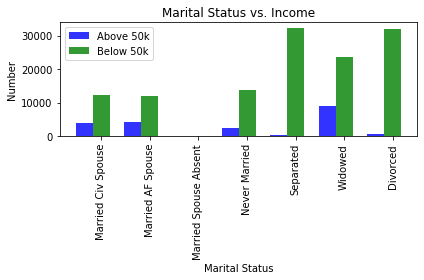

In [38]:
n_groups = 7

# married-civ-spouse
marriedciv_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,33]==1, adult_data_export[:,3]==1))
marriedciv_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,33]==0, adult_data_export[:,3]==1))

# married-af-spouse
marriedaf_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,32]==1, adult_data_export[:,3]==1))
marriedaf_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,32]==0, adult_data_export[:,3]==1))

# married-spouse-absent
marriedabs_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,34]==1, adult_data_export[:,3]==1))
marriedabs_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,34]==0, adult_data_export[:,3]==1))

# never married
nevermar_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,35]==1, adult_data_export[:,3]==1))
nevermar_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,35]==0, adult_data_export[:,3]==1))

# separated
separated_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,36]==1, adult_data_export[:,3]==0))
separated_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,36]==0, adult_data_export[:,3]==0))

# widowed
widowed_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,37]==1, adult_data_export[:,3]==0))
widowed_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,37]==0, adult_data_export[:,3]==0))

# divorced
divorced_above50k = np.count_nonzero(np.logical_and(adult_data_export[:,31]==1, adult_data_export[:,3]==0))
divorced_below50k = np.count_nonzero(np.logical_and(adult_data_export[:,31]==0, adult_data_export[:,3]==0))

num_above50k = (marriedciv_above50k, marriedaf_above50k, marriedabs_above50k, nevermar_above50k, 
                separated_above50k, widowed_above50k, divorced_above50k)
num_below50k = (marriedciv_below50k, marriedaf_below50k, marriedabs_above50k, nevermar_below50k,
               separated_below50k, widowed_below50k, divorced_below50k)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, num_above50k, bar_width,
alpha=opacity,
color='b',
label='Above 50k')

rects2 = plt.bar(index + bar_width, num_below50k, bar_width,
alpha=opacity,
color='g',
label='Below 50k')

plt.xlabel('Marital Status')
plt.ylabel('Number')
plt.title('Marital Status vs. Income')
plt.xticks(index + bar_width, ('Married Civ Spouse', 'Married AF Spouse', 'Married Spouse Absent', 'Never Married', 'Separated',
                              'Widowed', 'Divorced'), rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()
